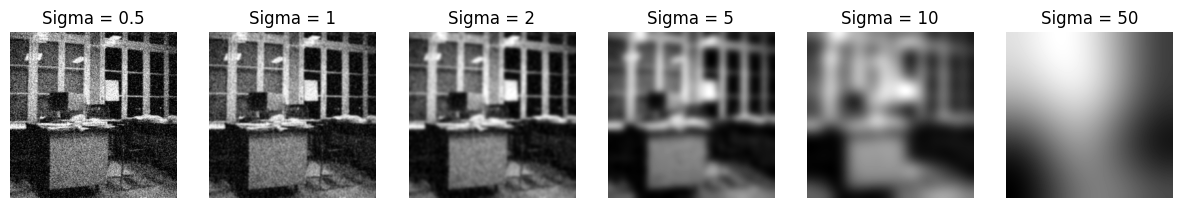

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float
from scipy.ndimage import gaussian_filter

def apply_gaussian_smoothing(image, sigmas):
    # Create a figure to display results
    plt.figure(figsize=(15, 10))

    # Iterate over the list of sigma values
    for i, sigma in enumerate(sigmas):
        # Apply Gaussian smoothing
        smoothed_image = gaussian_filter(image, sigma=sigma)

        # Display the smoothed image
        plt.subplot(2, len(sigmas), i + 1)
        plt.imshow(smoothed_image, cmap='gray')
        plt.title(f'Sigma = {sigma}')
        plt.axis('off')

    plt.show()

# Load images
C_Image = img_as_float(io.imread('office.png'))
N_Image = img_as_float(io.imread('office_noisy.png'))

# Define the list of sigma values
sigmas = [0.5, 1, 2, 5, 10, 50]

# Apply Gaussian smoothing to the noisy image
apply_gaussian_smoothing(N_Image, sigmas)


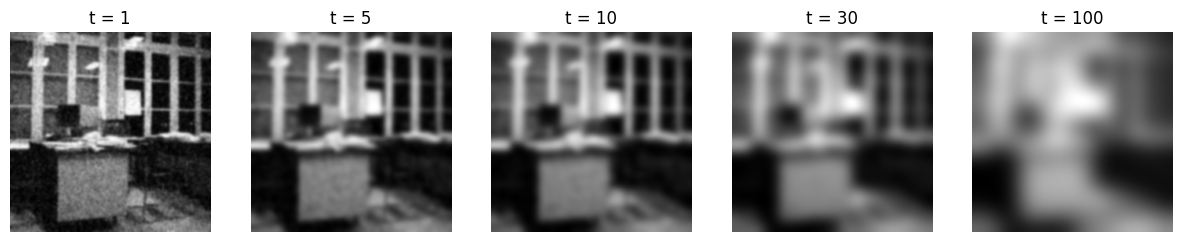

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float
from scipy.ndimage import gaussian_filter

def perform_diffusion(image, diffusivity, times):
    plt.figure(figsize=(15, 10))

    for i, t in enumerate(times):
        # Apply Gaussian smoothing with sigma = sqrt(2 * diffusivity * t)
        sigma = np.sqrt(2 * diffusivity * t)
        diffused_image = gaussian_filter(image, sigma=sigma)

        # Display the diffused image
        plt.subplot(2, len(times), i + 1)
        plt.imshow(diffused_image, cmap='gray')
        plt.title(f't = {t}')
        plt.axis('off')

    plt.show()

# Load noisy image
N_Image = img_as_float(io.imread('office_noisy.png'))

# Parameters
diffusivity = 1
times = [1, 5, 10, 30, 100]

# Perform diffusion
perform_diffusion(N_Image, diffusivity, times)


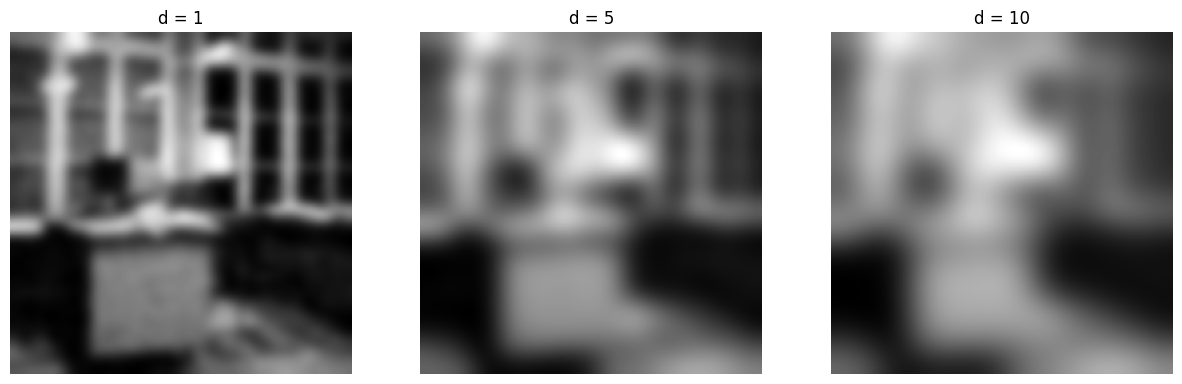

In [6]:
def perform_diffusion_with_d(image, diffusivities, t):
    plt.figure(figsize=(15, 10))

    for i, d in enumerate(diffusivities):
        # Apply Gaussian smoothing with sigma = sqrt(2 * d * t)
        sigma = np.sqrt(2 * d * t)
        diffused_image = gaussian_filter(image, sigma=sigma)

        # Display the diffused image
        plt.subplot(1, len(diffusivities), i + 1)
        plt.imshow(diffused_image, cmap='gray')
        plt.title(f'd = {d}')
        plt.axis('off')

    plt.show()

# Parameters
diffusivities = [1, 5, 10]
t = 10

# Perform diffusion
perform_diffusion_with_d(N_Image, diffusivities, t)


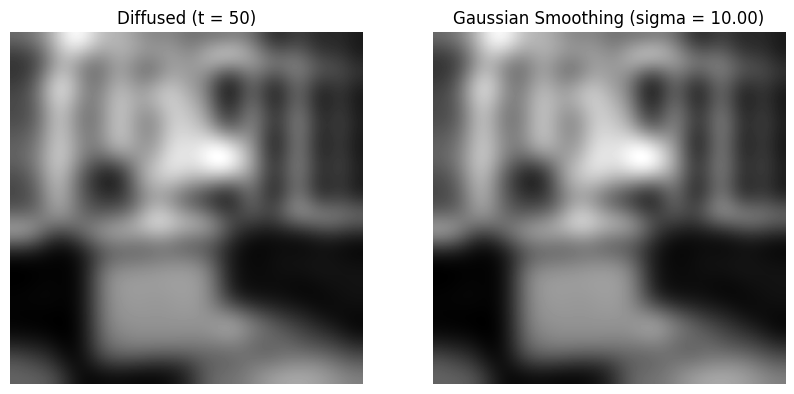

In [12]:
def verify_equivalence(image, t):
    sigma = np.sqrt(2 * t)

    # Perform diffusion with d=1
    diffused_image = gaussian_filter(image, sigma=sigma)

    # Perform Gaussian smoothing directly with the same sigma
    smoothed_image = gaussian_filter(image, sigma=sigma)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(diffused_image, cmap='gray')
    plt.title(f'Diffused (t = {t})')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(smoothed_image, cmap='gray')
    plt.title(f'Gaussian Smoothing (sigma = {sigma:.2f})')
    plt.axis('off')

    plt.show()

# Parameters
t = 50

# Verify equivalence
verify_equivalence(N_Image, t)


Processing with iterations = 1
Iteration: 1/1
Processing with iterations = 5
Iteration: 1/5
Iteration: 2/5
Iteration: 3/5
Iteration: 4/5
Iteration: 5/5
Processing with iterations = 10
Iteration: 1/10
Iteration: 2/10
Iteration: 3/10
Iteration: 4/10
Iteration: 5/10
Iteration: 6/10
Iteration: 7/10
Iteration: 8/10
Iteration: 9/10
Iteration: 10/10
Processing with iterations = 30
Iteration: 1/30
Iteration: 2/30
Iteration: 3/30
Iteration: 4/30
Iteration: 5/30
Iteration: 6/30
Iteration: 7/30
Iteration: 8/30
Iteration: 9/30
Iteration: 10/30
Iteration: 11/30
Iteration: 12/30
Iteration: 13/30
Iteration: 14/30
Iteration: 15/30
Iteration: 16/30
Iteration: 17/30
Iteration: 18/30
Iteration: 19/30
Iteration: 20/30
Iteration: 21/30
Iteration: 22/30
Iteration: 23/30
Iteration: 24/30
Iteration: 25/30
Iteration: 26/30
Iteration: 27/30
Iteration: 28/30
Iteration: 29/30
Iteration: 30/30
Processing with iterations = 100
Iteration: 1/100
Iteration: 2/100
Iteration: 3/100
Iteration: 4/100
Iteration: 5/100
Iter

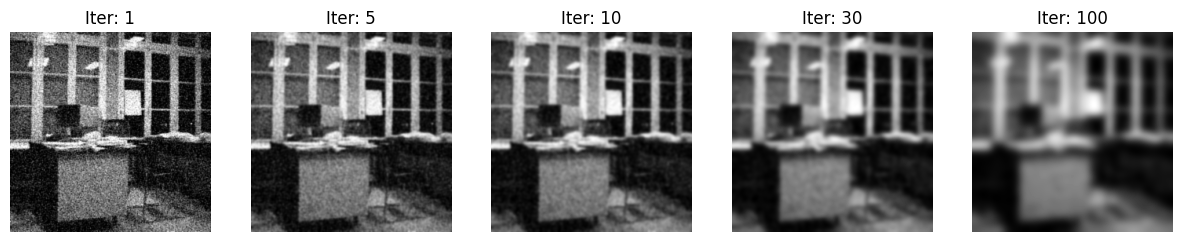

In [30]:
import numpy as np
import scipy.signal
from skimage import io, img_as_float
import matplotlib.pyplot as plt
from PIL import Image

def nonlinearDiffusionFilter(image: np.ndarray,
                            iterations=10,
                            lamb=1.0,
                            tau=0.125,
                            image_seq=None):


    def computeUpdate(u: np.ndarray, g: np.ndarray):

        update = np.zeros(u.shape, dtype=float)
        u = np.pad(u, pad_width=1, mode='constant')
        g = np.pad(g, pad_width=1, mode='constant')

        for i in range(1, u.shape[1]-1):
            for j in range(1, u.shape[0]-1):

                g_pj = np.sqrt(g[j, i+1] * g[j, i])
                g_nj = np.sqrt(g[j, i-1] * g[j, i])
                g_ip = np.sqrt(g[j+1, i] * g[j, i])
                g_in = np.sqrt(g[j-1, i] * g[j, i])

                if i == u.shape[1] - 2:
                    g_pj = 0
                if i == 1:
                    g_nj = 0
                if j == u.shape[0] - 2:
                    g_ip = 0
                if j == 1:
                    g_in = 0

                ux0 = g_pj * (u[j, i+1] - u[j, i])
                ux1 = -g_nj * (u[j, i] - u[j, i-1])
                uy0 = g_ip * (u[j+1, i] - u[j, i])
                uy1 = -g_in * (u[j, i] - u[j-1, i])

                # update is not padded so need to subtract 1 from i and j
                update[j-1, i-1] = ux0 + ux1 + uy0 + uy1
        return update

    def computeDiffusivity(u: np.ndarray, lamb: float):
        """
            Compute the nonlinear, gradient derived, diffusivity.
        """
        if len(u.shape) > 2 and u.shape[2] > 1:
            print("RGB to gray")
            from skimage.color import rgb2gray
            u = rgb2gray(u)
        gradkernelx = 0.5 * np.array([[ 0.0, 0.0, 0.0],
                                      [-1.0, 0.0, 1.0],
                                      [ 0.0, 0.0, 0.0]])
        gradkernely = 0.5 * np.array([[ 0.0,-1.0, 0.0],
                                      [ 0.0, 0.0, 0.0],
                                      [ 0.0, 1.0, 0.0]])
        gradx  = scipy.signal.convolve2d(u, gradkernelx, boundary='symm')
        grady  = scipy.signal.convolve2d(u, gradkernely, boundary='symm')
        gradm2 = np.power(gradx, 2) + np.power(grady, 2)
        g = 1.0 / np.sqrt(1.0 + gradm2 / (lamb * lamb))
        return g

    u = np.copy(image)
    if len(u.shape) > 2 and u.shape[2] == 1:
        u = np.reshape(u, (u.shape[0], u.shape[1]))
    if image_seq is not None:
        image_seq.append(np.copy(u))

    for i in range(iterations):
        print(f"Iteration: {i+1}/{iterations}")
        g = computeDiffusivity(u, lamb)
        update = computeUpdate(u, g)
        u = u + tau * update
        if image_seq is not None:
            image_seq.append(np.copy(u))
    return u

# Load the image and convert it to floating point format
image = img_as_float(io.imread('office_noisy.png', as_gray=True))

# Define parameters
lamb = 0.5
tau = 0.125
iterations_list = [1, 5, 10, 30, 100]

# Apply nonlinear diffusion filter
results = {}
for iterations in iterations_list:
    print(f"Processing with iterations = {iterations}")
    image_seq = []
    filtered_image = nonlinearDiffusionFilter(image, iterations=iterations, lamb=lamb, tau=tau, image_seq=image_seq)
    results[iterations] = filtered_image

# Save results and display them
for iterations, img in results.items():
    Image.fromarray((img * 255).astype(np.uint8)).save(f'office_noisy_filtered_{iterations}.png')

# Optionally, display results
fig, axs = plt.subplots(1, len(results), figsize=(15, 5))
for ax, (iterations, img) in zip(axs, results.items()):
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Iter: {iterations}')
    ax.axis('off')
plt.show()


Processing with iterations = 1
Iteration: 1/1
Processing with iterations = 5
Iteration: 1/5
Iteration: 2/5
Iteration: 3/5
Iteration: 4/5
Iteration: 5/5
Processing with iterations = 10
Iteration: 1/10
Iteration: 2/10
Iteration: 3/10
Iteration: 4/10
Iteration: 5/10
Iteration: 6/10
Iteration: 7/10
Iteration: 8/10
Iteration: 9/10
Iteration: 10/10
Processing with iterations = 30
Iteration: 1/30
Iteration: 2/30
Iteration: 3/30
Iteration: 4/30
Iteration: 5/30
Iteration: 6/30
Iteration: 7/30
Iteration: 8/30
Iteration: 9/30
Iteration: 10/30
Iteration: 11/30
Iteration: 12/30
Iteration: 13/30
Iteration: 14/30
Iteration: 15/30
Iteration: 16/30
Iteration: 17/30
Iteration: 18/30
Iteration: 19/30
Iteration: 20/30
Iteration: 21/30
Iteration: 22/30
Iteration: 23/30
Iteration: 24/30
Iteration: 25/30
Iteration: 26/30
Iteration: 27/30
Iteration: 28/30
Iteration: 29/30
Iteration: 30/30
Processing with iterations = 100
Iteration: 1/100
Iteration: 2/100
Iteration: 3/100
Iteration: 4/100
Iteration: 5/100
Iter

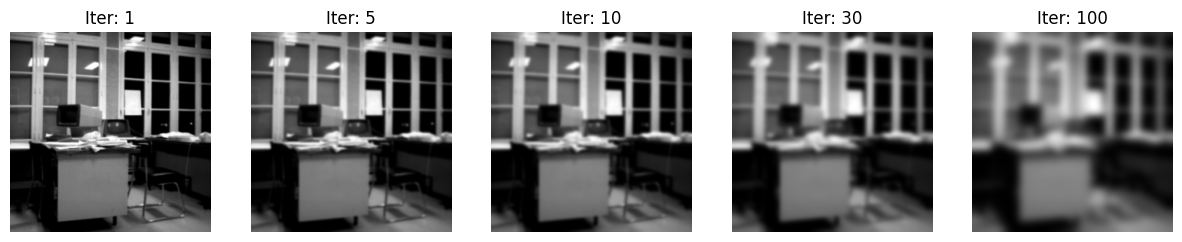

In [31]:
import numpy as np
import scipy.signal
from skimage import io, img_as_float
import matplotlib.pyplot as plt
from PIL import Image

def nonlinearDiffusionFilter(image: np.ndarray,
                            iterations=10,
                            lamb=1.0,
                            tau=0.125,
                            image_seq=None):
    """
        Execute nonlinear, isotropic, smoothing filter on image.
        The method is described in the 1990 paper by Perona and Malik.
        This smoothing method uses diffusion that preserves edges.
    """

    def computeUpdate(u: np.ndarray, g: np.ndarray):
        """
            Compute the update for the next iteration using the spatial
            derivatives.
        """
        update = np.zeros(u.shape, dtype=float)
        u = np.pad(u, pad_width=1, mode='constant')
        g = np.pad(g, pad_width=1, mode='constant')

        for i in range(1, u.shape[1]-1):
            for j in range(1, u.shape[0]-1):

                g_pj = np.sqrt(g[j, i+1] * g[j, i])
                g_nj = np.sqrt(g[j, i-1] * g[j, i])
                g_ip = np.sqrt(g[j+1, i] * g[j, i])
                g_in = np.sqrt(g[j-1, i] * g[j, i])

                if i == u.shape[1] - 2:
                    g_pj = 0
                if i == 1:
                    g_nj = 0
                if j == u.shape[0] - 2:
                    g_ip = 0
                if j == 1:
                    g_in = 0

                ux0 = g_pj * (u[j, i+1] - u[j, i])
                ux1 = -g_nj * (u[j, i] - u[j, i-1])
                uy0 = g_ip * (u[j+1, i] - u[j, i])
                uy1 = -g_in * (u[j, i] - u[j-1, i])

                # update is not padded so need to subtract 1 from i and j
                update[j-1, i-1] = ux0 + ux1 + uy0 + uy1
        return update

    def computeDiffusivity(u: np.ndarray, lamb: float):
        """
            Compute the nonlinear, gradient derived, diffusivity.
        """
        if len(u.shape) > 2 and u.shape[2] > 1:
            print("RGB to gray")
            from skimage.color import rgb2gray
            u = rgb2gray(u)
        gradkernelx = 0.5 * np.array([[ 0.0, 0.0, 0.0],
                                      [-1.0, 0.0, 1.0],
                                      [ 0.0, 0.0, 0.0]])
        gradkernely = 0.5 * np.array([[ 0.0,-1.0, 0.0],
                                      [ 0.0, 0.0, 0.0],
                                      [ 0.0, 1.0, 0.0]])
        gradx  = scipy.signal.convolve2d(u, gradkernelx, boundary='symm')
        grady  = scipy.signal.convolve2d(u, gradkernely, boundary='symm')
        gradm2 = np.power(gradx, 2) + np.power(grady, 2)
        g = 1.0 / np.sqrt(1.0 + gradm2 / (lamb * lamb))
        return g

    u = np.copy(image)
    if len(u.shape) > 2 and u.shape[2] == 1:
        u = np.reshape(u, (u.shape[0], u.shape[1]))
    if image_seq is not None:
        image_seq.append(np.copy(u))

    for i in range(iterations):
        print(f"Iteration: {i+1}/{iterations}")
        g = computeDiffusivity(u, lamb)
        update = computeUpdate(u, g)
        u = u + tau * update
        if image_seq is not None:
            image_seq.append(np.copy(u))
    return u

# Load the image and convert it to floating point format
image = img_as_float(io.imread('office.png', as_gray=True))

# Define parameters
lamb = 0.5
tau = 0.125
iterations_list = [1, 5, 10, 30, 100]

# Apply nonlinear diffusion filter
results = {}
for iterations in iterations_list:
    print(f"Processing with iterations = {iterations}")
    image_seq = []
    filtered_image = nonlinearDiffusionFilter(image, iterations=iterations, lamb=lamb, tau=tau, image_seq=image_seq)
    results[iterations] = filtered_image

# Save results and display them
for iterations, img in results.items():
    Image.fromarray((img * 255).astype(np.uint8)).save(f'office_filtered_{iterations}.png')

# Optionally, display results
fig, axs = plt.subplots(1, len(results), figsize=(15, 5))
for ax, (iterations, img) in zip(axs, results.items()):
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Iter: {iterations}')
    ax.axis('off')
plt.show()


Processing with lambda = 0.5
Iteration: 1/10
Iteration: 2/10
Iteration: 3/10
Iteration: 4/10
Iteration: 5/10
Iteration: 6/10
Iteration: 7/10
Iteration: 8/10
Iteration: 9/10
Iteration: 10/10
Processing with lambda = 1
Iteration: 1/10
Iteration: 2/10
Iteration: 3/10
Iteration: 4/10
Iteration: 5/10
Iteration: 6/10
Iteration: 7/10
Iteration: 8/10
Iteration: 9/10
Iteration: 10/10
Processing with lambda = 2
Iteration: 1/10
Iteration: 2/10
Iteration: 3/10
Iteration: 4/10
Iteration: 5/10
Iteration: 6/10
Iteration: 7/10
Iteration: 8/10
Iteration: 9/10
Iteration: 10/10
Processing with lambda = 5
Iteration: 1/10
Iteration: 2/10
Iteration: 3/10
Iteration: 4/10
Iteration: 5/10
Iteration: 6/10
Iteration: 7/10
Iteration: 8/10
Iteration: 9/10
Iteration: 10/10
Processing with lambda = 10
Iteration: 1/10
Iteration: 2/10
Iteration: 3/10
Iteration: 4/10
Iteration: 5/10
Iteration: 6/10
Iteration: 7/10
Iteration: 8/10
Iteration: 9/10
Iteration: 10/10


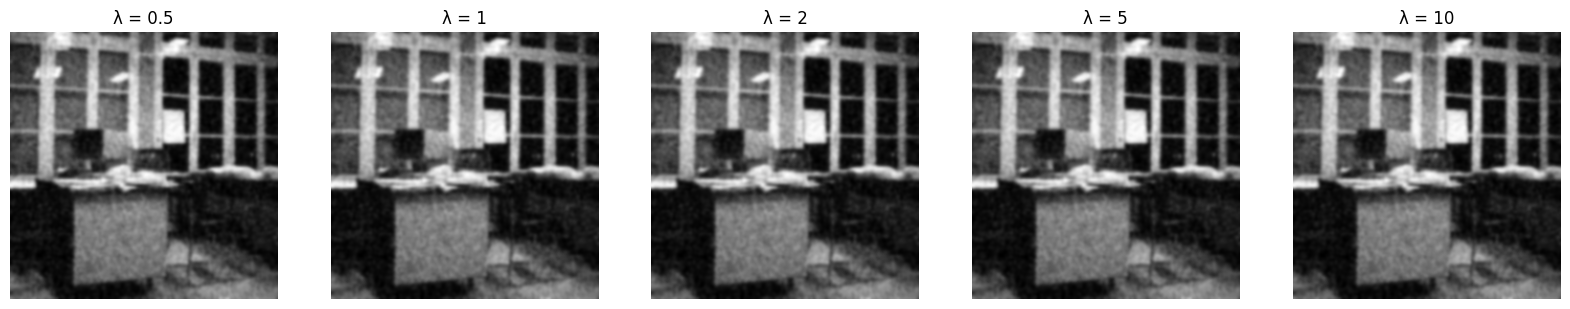

In [32]:
import numpy as np
import scipy.signal
from skimage import io, img_as_float
import matplotlib.pyplot as plt
from PIL import Image

def nonlinearDiffusionFilter(image: np.ndarray,
                            iterations=10,
                            lamb=1.0,
                            tau=0.125,
                            image_seq=None):
    """
        Execute nonlinear, isotropic, smoothing filter on image.
        The method is described in the 1990 paper by Perona and Malik.
        This smoothing method uses diffusion that preserves edges.
    """

    def computeUpdate(u: np.ndarray, g: np.ndarray):
        """
            Compute the update for the next iteration using the spatial
            derivatives.
        """
        update = np.zeros(u.shape, dtype=float)
        u = np.pad(u, pad_width=1, mode='constant')
        g = np.pad(g, pad_width=1, mode='constant')

        for i in range(1, u.shape[1]-1):
            for j in range(1, u.shape[0]-1):

                g_pj = np.sqrt(g[j, i+1] * g[j, i])
                g_nj = np.sqrt(g[j, i-1] * g[j, i])
                g_ip = np.sqrt(g[j+1, i] * g[j, i])
                g_in = np.sqrt(g[j-1, i] * g[j, i])

                if i == u.shape[1] - 2:
                    g_pj = 0
                if i == 1:
                    g_nj = 0
                if j == u.shape[0] - 2:
                    g_ip = 0
                if j == 1:
                    g_in = 0

                ux0 = g_pj * (u[j, i+1] - u[j, i])
                ux1 = -g_nj * (u[j, i] - u[j, i-1])
                uy0 = g_ip * (u[j+1, i] - u[j, i])
                uy1 = -g_in * (u[j, i] - u[j-1, i])

                # update is not padded so need to subtract 1 from i and j
                update[j-1, i-1] = ux0 + ux1 + uy0 + uy1
        return update

    def computeDiffusivity(u: np.ndarray, lamb: float):
        """
            Compute the nonlinear, gradient derived, diffusivity.
        """
        if len(u.shape) > 2 and u.shape[2] > 1:
            print("RGB to gray")
            from skimage.color import rgb2gray
            u = rgb2gray(u)
        gradkernelx = 0.5 * np.array([[ 0.0, 0.0, 0.0],
                                      [-1.0, 0.0, 1.0],
                                      [ 0.0, 0.0, 0.0]])
        gradkernely = 0.5 * np.array([[ 0.0,-1.0, 0.0],
                                      [ 0.0, 0.0, 0.0],
                                      [ 0.0, 1.0, 0.0]])
        gradx  = scipy.signal.convolve2d(u, gradkernelx, boundary='symm')
        grady  = scipy.signal.convolve2d(u, gradkernely, boundary='symm')
        gradm2 = np.power(gradx, 2) + np.power(grady, 2)
        g = 1.0 / np.sqrt(1.0 + gradm2 / (lamb * lamb))
        return g

    u = np.copy(image)
    if len(u.shape) > 2 and u.shape[2] == 1:
        u = np.reshape(u, (u.shape[0], u.shape[1]))
    if image_seq is not None:
        image_seq.append(np.copy(u))

    for i in range(iterations):
        print(f"Iteration: {i+1}/{iterations}")
        g = computeDiffusivity(u, lamb)
        update = computeUpdate(u, g)
        u = u + tau * update
        if image_seq is not None:
            image_seq.append(np.copy(u))
    return u

# Load the noisy image and convert it to floating point format
image = img_as_float(io.imread('office_noisy.png', as_gray=True))

# Define parameters
tau = 0.125
iterations = 10
lamb_values = [0.5, 1, 2, 5, 10]

# Apply nonlinear diffusion filter for each lambda value
results = {}
for lamb in lamb_values:
    print(f"Processing with lambda = {lamb}")
    filtered_image = nonlinearDiffusionFilter(image, iterations=iterations, lamb=lamb, tau=tau)
    results[lamb] = filtered_image

# Save results and display them
for lamb, img in results.items():
    Image.fromarray((img * 255).astype(np.uint8)).save(f'office_noisy_filtered_lambda_{lamb}.png')

# Optionally, display results
fig, axs = plt.subplots(1, len(results), figsize=(20, 5))
for ax, (lamb, img) in zip(axs, results.items()):
    ax.imshow(img, cmap='gray')
    ax.set_title(f'λ = {lamb}')
    ax.axis('off')
plt.show()
